# *Project : predict "class"*

> # Import Libraries & Read Dataset

In [1]:
import requests

url = 'https://raw.githubusercontent.com/lko9911/Kaggle/master/Compare_Classifier_models.py'

r = requests.get(url)

with open('Compare_Classifier_models.py', 'w') as f:
    f.write(r.text)

In [2]:
# For Compare modeling
from Compare_Classifier_models import evaluate_models

# For modeling
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris

# For 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv('/kaggle/input/mushroom-classification-edible-or-poisonous/mushroom.csv')
df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

> # Data Preprocessing

In [5]:
cols = df.columns.tolist()

for col in cols:
    unique_count = df[col].nunique()
    print(f'{col} has {unique_count} unique values')

class has 2 unique values
cap-diameter has 2571 unique values
cap-shape has 7 unique values
cap-surface has 11 unique values
cap-color has 12 unique values
does-bruise-or-bleed has 2 unique values
gill-attachment has 7 unique values
gill-spacing has 3 unique values
gill-color has 12 unique values
stem-height has 2226 unique values
stem-width has 4630 unique values
stem-root has 5 unique values
stem-surface has 8 unique values
stem-color has 13 unique values
veil-type has 1 unique values
veil-color has 6 unique values
has-ring has 2 unique values
ring-type has 8 unique values
spore-print-color has 7 unique values
habitat has 8 unique values
season has 4 unique values


In [6]:
for col in cols:
    unique_name = df[col].unique()
    print(f'{col} has {unique_name}')

class has ['p' 'e']
cap-diameter has [15.26 16.6  14.07 ... 22.85 21.8  20.42]
cap-shape has ['x' 'f' 'p' 'b' 'c' 's' 'o']
cap-surface has ['g' 'h' nan 't' 'y' 'e' 's' 'l' 'd' 'w' 'i' 'k']
cap-color has ['o' 'e' 'n' 'g' 'r' 'w' 'y' 'p' 'u' 'b' 'l' 'k']
does-bruise-or-bleed has ['f' 't']
gill-attachment has ['e' nan 'a' 'd' 's' 'x' 'p' 'f']
gill-spacing has [nan 'c' 'd' 'f']
gill-color has ['w' 'n' 'p' 'u' 'b' 'g' 'y' 'r' 'e' 'o' 'k' 'f']
stem-height has [16.95 17.99 17.8  ...  1.23  1.16  0.  ]
stem-width has [17.09 18.19 17.74 ... 32.59 30.99 30.51]
stem-root has ['s' nan 'b' 'r' 'c' 'f']
stem-surface has ['y' nan 's' 'k' 'i' 'h' 't' 'g' 'f']
stem-color has ['w' 'y' 'n' 'u' 'b' 'l' 'r' 'p' 'e' 'k' 'g' 'o' 'f']
veil-type has ['u' nan]
veil-color has ['w' 'y' nan 'n' 'e' 'u' 'k']
has-ring has ['t' 'f']
ring-type has ['g' 'p' 'e' 'l' 'f' 'm' nan 'r' 'z']
spore-print-color has [nan 'w' 'p' 'k' 'r' 'u' 'n' 'g']
habitat has ['d' 'm' 'g' 'h' 'l' 'p' 'w' 'u']
season has ['w' 'u' 'a' 's']


In [7]:
missing_ratios = df.isna().mean()
missing_ratios

class                   0.000000
cap-diameter            0.000000
cap-shape               0.000000
cap-surface             0.231214
cap-color               0.000000
does-bruise-or-bleed    0.000000
gill-attachment         0.161850
gill-spacing            0.410405
gill-color              0.000000
stem-height             0.000000
stem-width              0.000000
stem-root               0.843931
stem-surface            0.624277
stem-color              0.000000
veil-type               0.947977
veil-color              0.878613
has-ring                0.000000
ring-type               0.040462
spore-print-color       0.895954
habitat                 0.000000
season                  0.000000
dtype: float64

In [8]:
high_missing_columns = missing_ratios[missing_ratios >= 0.4]
df_high_missing_ratio = pd.DataFrame({'Column': high_missing_columns.index, 'Missing_Ratio': high_missing_columns.values})

df_high_missing_ratio

,Column,Missing_Ratio
0,gill-spacing,0.410405
1,stem-root,0.843931
2,stem-surface,0.624277
3,veil-type,0.947977
4,veil-color,0.878613
5,spore-print-color,0.895954


### As a result of comparison with other variables, it is determined that each variable's "Nan" value is meaningless as data. So if the missing value ratio is more than 40%, remove the column, and if not, remove the row.

In [9]:
df = df.drop(df_high_missing_ratio['Column'], axis=1)
df.dropna(inplace = True)
df.isna().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [10]:
object_cols = df.select_dtypes(include=['object']).columns
object_cols = object_cols.drop('class')

df = pd.get_dummies(df, columns=object_cols)
df['class'] = df['class'].map({'p': 0, 'e': 1})    
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37065 entries, 0 to 61068
Data columns (total 87 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   class                   37065 non-null  int64  
 1   cap-diameter            37065 non-null  float64
 2   stem-height             37065 non-null  float64
 3   stem-width              37065 non-null  float64
 4   cap-shape_b             37065 non-null  bool   
 5   cap-shape_c             37065 non-null  bool   
 6   cap-shape_f             37065 non-null  bool   
 7   cap-shape_o             37065 non-null  bool   
 8   cap-shape_p             37065 non-null  bool   
 9   cap-shape_s             37065 non-null  bool   
 10  cap-shape_x             37065 non-null  bool   
 11  cap-surface_d           37065 non-null  bool   
 12  cap-surface_e           37065 non-null  bool   
 13  cap-surface_g           37065 non-null  bool   
 14  cap-surface_h           37065 non-null  boo

> # Compare models

In [11]:
X = df.drop("class", axis=1)
y = df["class"]

evaluate_models(X, y)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 13627, number of negative: 16025
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1014
[LightGBM] [Info] Number of data points in the train set: 29652, number of used features: 86
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.459564 -> initscore=-0.162097
[LightGBM] [Info] Start training from score -0.162097


,Model,Accuracy
0,Logistic Regression,0.792122
1,Decision Tree Classifier,0.997707
2,Random Forest Classifier,0.999865
3,Support Vector Classifier,0.997572
4,K-Nearest Neighbors Classifier,0.999460
5,XGBoost Classifier,0.999595
6,LightGBM Classifier,0.999460


> # Evaluating XGboost Classifier

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [13]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (percentage) :", round(accuracy*100,4),"%")

Accuracy (percentage) : 99.9595 %


In [14]:
report = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,1.000000,0.999268,0.999634,4096.000000
1,0.999096,1.000000,0.999548,3317.000000
accuracy,0.999595,0.999595,0.999595,0.999595
macro avg,0.999548,0.999634,0.999591,7413.000000
weighted avg,0.999596,0.999595,0.999595,7413.000000


High Correlation Features(Top 10) :  ['class', 'gill-attachment_p', 'stem-color_w', 'stem-width', 'cap-color_n', 'cap-diameter', 'cap-surface_s', 'stem-height', 'stem-color_g', 'ring-type_l']


<Axes: >

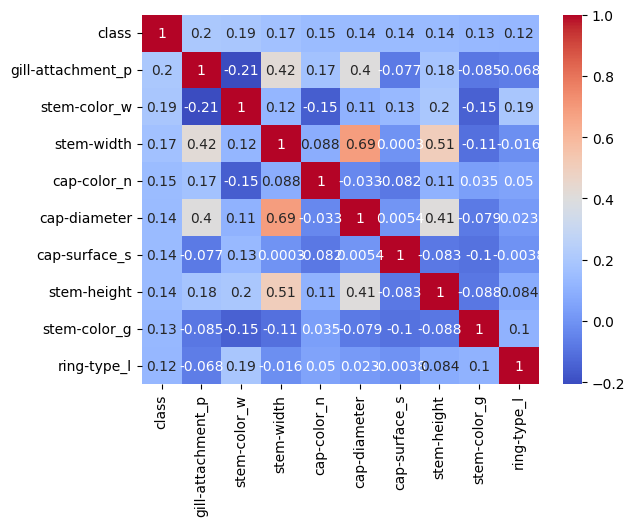

In [15]:
correlation_matrix = df.corr()
col_features = correlation_matrix['class'].sort_values(ascending=False).head(10).index.tolist()
col_subset = df[col_features]
col_matrix_subset = col_subset.corr()


print("High Correlation Features(Top 10) : ", col_features)
sns.heatmap(col_matrix_subset, annot=True, cmap='coolwarm')

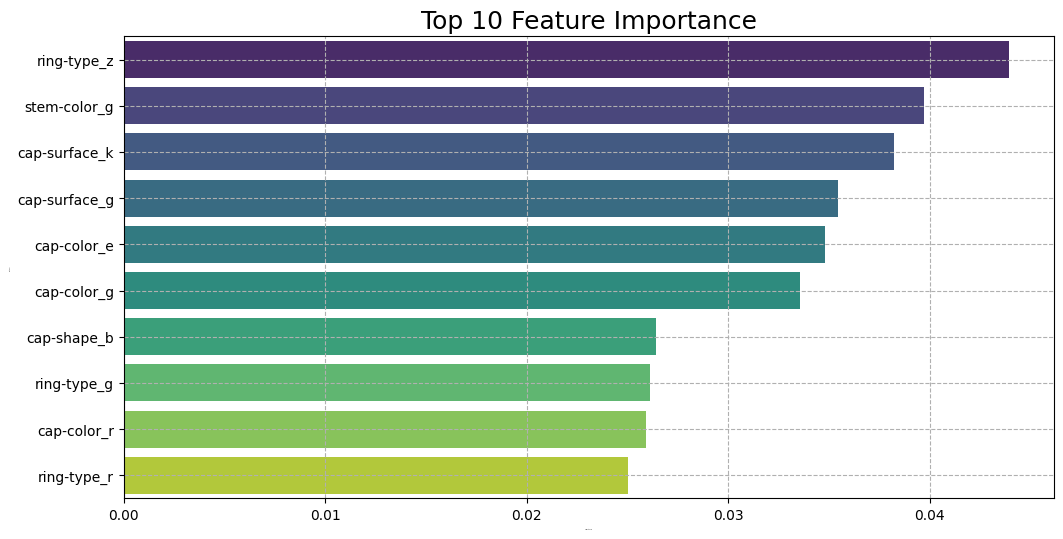

In [16]:
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
top_10_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_features, x='Importance', y='Feature', palette='viridis')
plt.xlabel('Importance', fontsize=1)
plt.ylabel('Feature', fontsize=1)
plt.title('Top 10 Feature Importance', fontsize=18)
plt.grid(linestyle = '--')
plt.show()

# Thanks